In [1]:
#https://docs.google.com/document/d/1El1-T2lec7XrP9nWWaaGBtCreLRDOgsPt7DeOJf6ED8/edit?usp=sharing

In [2]:
#https://www.kaggle.com/datasets/aadiltajani/fia-f1-19502019-data?resource=download&select=qualifying_times_2006-2020.csv

## Introduccion General


El dataset lo saqué de Kaggle y son datos de todos los Qualifyngs de Formula1 desde el 2006 hasta el 2020. Muestra el nombre de Cada piloto, a que escudería representa, como salió en los Qualifyngs de cada circuito distinto y los tiempos que hizo en cada Qualy.
Mi objetivo es poder analizar un poco a todos los pilotos que fueron pasando por formula1 y ver un poco mediante datos quienes fueron a los que mejor les fue, que escuderías son las más grandes y tendrían que tener más reconocimiento, que pilotos por estadísticas se merecen estar entre los más grandes de la historia de este deporte.
Por eso elegí este dataset para poder yo mismo con mis propias manos,analizar todo eso y poder sacar mis propias conclusiones.
Aca las columnas más interesantes van a ser las de los 3 distintos Qualifyngs, que muestran el tiempo de cuanto tardo el piloto en completar su vuelta más rápida.
Con estos tiempos vamos a poder ver muchas cosas, como cuanto más rapido o más lento es comparado a los otros pilotos,cuanto mejora cada pilota o cuanto empeora, quien fue el más rapido y por cuanto.

Year: año del qualy
Position: posicion de llegada
Driver No: numero unico que identifica a cada piloto
Venue: circuito donde se realiza el qualy
Name: nombre del piloto
NameTag: abreviacion del nombre del piloto
Team: escuderia a la que representa el piloto
Q1: tiempo que hizo en la primer qualy
Q2: tiempo que hizo en la segunda qualy
Q3: tiempo que hizo en la tercera qualy
Laps: vueltas totales que dio al circuito

## Importacion de los Datos

Empezamos importando el dataset mediante pandas y lo llamamos qualys.

In [3]:
import pandas as pd


qualys = pd.read_csv('datos/qualifying_times_2006-2020.csv', delimiter =",")

In [4]:
qualys

,Unnamed: 0,Year,Position,Driver No.,Venue,Name,NameTag,Team,Q1,Q2,Q3,Laps
0,0,2006,1,5,bahrain,Michael Schumacher,MSC,Ferrari,1:33.310,1:32.025,1:31.431,20
1,1,2006,2,6,bahrain,Felipe Massa,MAS,Ferrari,1:33.579,1:32.014,1:31.478,20
2,2,2006,3,12,bahrain,Jenson Button,BUT,Honda,1:32.603,1:32.025,1:31.549,23
3,3,2006,4,1,bahrain,Fernando Alonso,ALO,Renault,1:32.433,1:31.215,1:31.702,20
4,4,2006,5,4,bahrain,Juan Pablo Montoya,MOY,McLaren Mercedes,1:33.233,1:31.487,1:32.164,20
...,...,...,...,...,...,...,...,...,...,...,...,...
6084,6084,2020,16,7,abu-dhabi,Kimi RÃ¤ikkÃ¶nen,RAI,Alfa Romeo Racing Ferrari,1:37.555,NaN,NaN,6
6085,6085,2020,17,20,abu-dhabi,Kevin Magnussen,MAG,Haas Ferrari,1:37.863,NaN,NaN,9
6086,6086,2020,18,63,abu-dhabi,George Russell,RUS,Williams Mercedes,1:38.045,NaN,NaN,8
6087,6087,2020,19,51,abu-dhabi,Pietro Fittipaldi,FIT,Haas Ferrari,1:38.173,NaN,NaN,9


## Un Poquito de Limpieza

Esta es la funcion que me mandaste para pasar los tiempos a segundos

In [5]:
def time_to_seconds2(time):
    """ funcion que convierte un string de tiempo en segundos. Se asume que el string tiene el formato HH:MM:SS
    """

    #if time is a float return 0
    if type(time) == float:
        return time
    # ------------------ normalizacion del string ------------------
    #keep only numbers and dots
    time = ''.join([i for i in time if i.isdigit() or i == '.' or i == ':'])
    # if time is empty replace by 0
    if time == '' or time == "nan":
        return 0
    # ------------------ preprocess part------------------
    # esta es la primera parte del string
    if time.find(":") == -1:
        # si no tiene dos puntos, es un string de segundos
        return float(time)
    else:
        # si tiene dos puntos, es un string de horas y minutos
        # separo la parte de horas y minutos
        time = time.split(":")
        # si tiene dos puntos, pero no tiene minutos, es un string de horas
        if len(time) == 2:
            return float(time[0]) * 60 + float(time[1])
        # si tiene dos puntos y tiene minutos, es un string de horas, minutos y segundos
        elif len(time) == 3:
            return float(time[0]) * 60 + float(time[1]) * 60 + float(time[2])

In [6]:
qualys.Q1 = qualys.Q1.apply(time_to_seconds2)
qualys.Q2 = qualys.Q2.apply(time_to_seconds2)
qualys.Q3 = qualys.Q3.apply(time_to_seconds2)

In [7]:
qualys = qualys.drop(columns= 'Unnamed: 0')

Aca vemos como pasamos los minutos directamente a segundos para que operar sea mucho mas sencillo

In [8]:
qualys

,Year,Position,Driver No.,Venue,Name,NameTag,Team,Q1,Q2,Q3,Laps
0,2006,1,5,bahrain,Michael Schumacher,MSC,Ferrari,93.310,92.025,91.431,20
1,2006,2,6,bahrain,Felipe Massa,MAS,Ferrari,93.579,92.014,91.478,20
2,2006,3,12,bahrain,Jenson Button,BUT,Honda,92.603,92.025,91.549,23
3,2006,4,1,bahrain,Fernando Alonso,ALO,Renault,92.433,91.215,91.702,20
4,2006,5,4,bahrain,Juan Pablo Montoya,MOY,McLaren Mercedes,93.233,91.487,92.164,20
...,...,...,...,...,...,...,...,...,...,...,...
6084,2020,16,7,abu-dhabi,Kimi RÃ¤ikkÃ¶nen,RAI,Alfa Romeo Racing Ferrari,97.555,NaN,NaN,6
6085,2020,17,20,abu-dhabi,Kevin Magnussen,MAG,Haas Ferrari,97.863,NaN,NaN,9
6086,2020,18,63,abu-dhabi,George Russell,RUS,Williams Mercedes,98.045,NaN,NaN,8
6087,2020,19,51,abu-dhabi,Pietro Fittipaldi,FIT,Haas Ferrari,98.173,NaN,NaN,9


## Que trae nuestro dataset?

Analizo un poco el dataset
Filas y columnas
Descripcion general de todos los datos

In [9]:
qualys.columns

Index(['Year', 'Position', 'Driver No.', 'Venue', 'Name', 'NameTag', 'Team',
       'Q1', 'Q2', 'Q3', 'Laps'],
      dtype='object')

In [10]:
qualys.shape

(6089, 11)

In [11]:
qualys.describe()

,Year,Driver No.,Q1,Q2,Q3,Laps
count,6089.000000,6089.000000,6084.000000,4442.000000,2810.000000,6089.000000
mean,2013.025620,18.767614,89.036879,87.992132,86.561019,14.902283
std,4.217556,18.821461,14.680041,14.339833,17.473719,5.880194
min,2006.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2010.000000,7.000000,79.298500,78.521500,77.428750,10.000000
50%,2013.000000,14.000000,88.879000,87.899000,87.497000,15.000000
75%,2017.000000,22.000000,98.008000,97.063000,96.584250,19.000000
max,2020.000000,99.000000,141.611000,132.470000,129.776000,35.000000


In [12]:
qualys = qualys.replace("DNS", "0")
qualys = qualys.fillna(0)
qualys = qualys.replace("continuous", "0")


Renombramos algunas columnas

In [13]:
qualys = qualys.rename(columns = {"Venue": "Circuit","Team": "Scuderia"})


## Outliers

In [14]:
qualys.nlargest(3,"Laps")


,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps
1439,2009,6,12,brazil,Sebastien Buemi,BUE,STR Ferrari,84.591,80.701,80.250,35
1881,2010,1,10,brazil,Nico Hulkenberg,HUL,Williams Cosworth,80.050,79.144,74.470,35
1885,2010,5,8,brazil,Fernando Alonso,ALO,Ferrari,78.987,79.010,75.989,34


In [15]:
qualys.nsmallest(3,"Laps")

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps
3364,2014,22,13,china,Pastor Maldonado,MAL,Lotus Renault,0.0,0.0,0.0,0
3495,2014,22,9,germany,Marcus Ericsson,ERI,Caterham Renault,0.0,0.0,0.0,0
5648,2019,NC,26,russia,Daniil Kvyat,KVY,Scuderia Toro Rosso Honda,0.0,0.0,0.0,0


C:\Users\Nacho\anaconda3\envs\pythonProject2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Laps'>

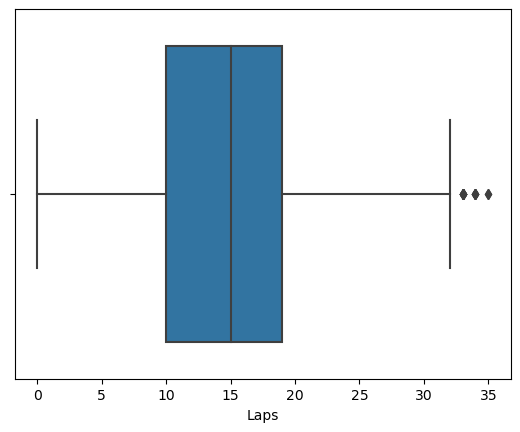

In [16]:
import seaborn as sns
sns.boxplot(qualys['Laps'])

Decido solo usar las filas con datos de 32 vueltas para abajo

In [17]:
qualys =  qualys[qualys.Laps <32]

In [18]:
qualys.nlargest(2, "Year")

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps
5749,2020,1,77,austria,Valtteri Bottas,BOT,Mercedes,64.111,63.015,62.939,19
5750,2020,2,44,austria,Lewis Hamilton,HAM,Mercedes,64.198,63.096,62.951,21


In [19]:
qualys.nsmallest(2, "Year")

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps
0,2006,1,5,bahrain,Michael Schumacher,MSC,Ferrari,93.310,92.025,91.431,20
1,2006,2,6,bahrain,Felipe Massa,MAS,Ferrari,93.579,92.014,91.478,20


Veo que Year no tiene outliers

C:\Users\Nacho\anaconda3\envs\pythonProject2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year'>

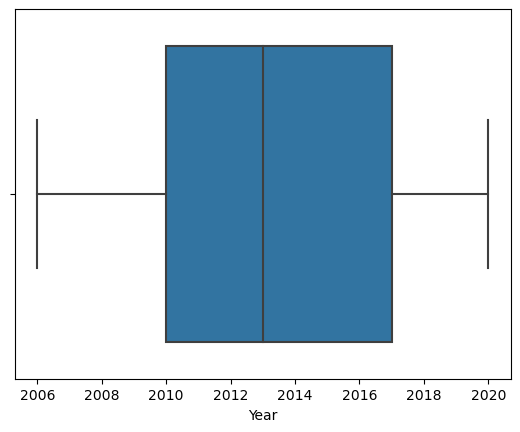

In [20]:
sns.boxplot(qualys['Year'])

Hay algunos valores que me molestan para trabajar con mi dataset entonces los reemplazo por 0

In [21]:
qualys = qualys.replace("EX", 0)
qualys = qualys.replace("NC", 0)
qualys = qualys.replace("DQ", 0)
qualys = qualys.replace("RT", 0)

In [22]:
qualys.Position= qualys.Position.astype(int)

Aca veo algo raro. Yo que veo formula1, se que los qualys lo corren 20 pilotos por lo que no entiendo porque hay posiciones por arriba de 20. Asi que me voy a fijar cuantos pilotos corrian en un qualy en 2010

In [23]:
qualys.nlargest(50,"Position")

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps
1497,2010,24,20,bahrain,Karun Chandhok,CHD,HRT Cosworth,124.904,0.0,0.0,7
1521,2010,24,20,australia,Karun Chandhok,CHD,HRT Cosworth,90.613,0.0,0.0,10
1545,2010,24,25,malaysia,Lucas di Grassi,DIG,Virgin Cosworth,119.977,0.0,0.0,4
1569,2010,24,20,china,Karun Chandhok,CHD,HRT Cosworth,100.578,0.0,0.0,7
1593,2010,24,21,spain,Bruno Senna,SEN,HRT Cosworth,87.122,0.0,0.0,9
1640,2010,24,20,turkey,Karun Chandhok,CHD,HRT Cosworth,92.060,0.0,0.0,10
1664,2010,24,20,canada,Karun Chandhok,CHD,HRT Cosworth,87.757,0.0,0.0,3
1688,2010,24,21,europe,Bruno Senna,SEN,HRT Cosworth,102.851,0.0,0.0,10
1712,2010,24,21,great-britain,Sakon Yamamoto,YAM,HRT Cosworth,96.968,0.0,0.0,9
1736,2010,24,25,germany,Lucas di Grassi,DIG,Virgin Cosworth,0.000,0.0,0.0,1


In [24]:
qualys.nsmallest(50,'Position')

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps
1153,2009,0,10,australia,Timo Glock,GLO,Toyota,0.000,0.000,0.000,19
1154,2009,0,9,australia,Jarno Trulli,TRU,Toyota,0.000,0.000,0.000,20
1951,2011,0,23,australia,Vitantonio Liuzzi,LIU,HRT Cosworth,92.978,0.000,0.000,11
1952,2011,0,22,australia,Narain Karthikeyan,KAR,HRT Cosworth,94.293,0.000,0.000,11
2024,2011,0,16,turkey,Kamui Kobayashi,KOB,Sauber Ferrari,0.000,0.000,0.000,2
2093,2011,0,25,canada,Jerome d'Ambrosio,DAM,Virgin Cosworth,79.414,0.000,0.000,13
2157,2011,0,18,germany,Sebastien Buemi,BUE,STR Ferrari,93.635,93.546,0.000,11
2210,2011,0,25,belgium,Jerome d'Ambrosio,DAM,Virgin Cosworth,131.601,0.000,0.000,9
2211,2011,0,23,belgium,Vitantonio Liuzzi,LIU,HRT Cosworth,131.616,0.000,0.000,9
2212,2011,0,22,belgium,Daniel Ricciardo,RIC,HRT Cosworth,133.077,0.000,0.000,9


Position tampoco tiene outliers

C:\Users\Nacho\anaconda3\envs\pythonProject2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Position'>

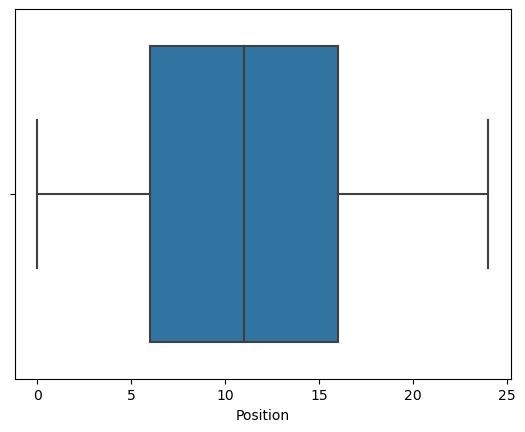

In [25]:
sns.boxplot(qualys['Position'])

## Creamos Nueva Columna

Esta nueva columna nos indica cuantos segundos mejoro cada piloto entre la Q1 y la Q3(en la Q3 siempre estan los tiempos más rapidos)

In [26]:
qualys["mejora"] = qualys.Q1 - qualys.Q3
qualys[['Year', 'Name', 'mejora']]

,Year,Name,mejora
0,2006,Michael Schumacher,1.879
1,2006,Felipe Massa,2.101
2,2006,Jenson Button,1.054
3,2006,Fernando Alonso,0.731
4,2006,Juan Pablo Montoya,1.069
...,...,...,...
6084,2020,Kimi RÃ¤ikkÃ¶nen,97.555
6085,2020,Kevin Magnussen,97.863
6086,2020,George Russell,98.045
6087,2020,Pietro Fittipaldi,98.173


## Empezamos a agrupar y Sacar Datos Interesantes

Aca vemos los que menos mejoraron entre la Q1 y la Q3

In [27]:
qualys.sort_values("mejora").head(10)

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps,mejora
2605,2012,10,9,germany,Kimi RÃ¤ikkÃ¶nen,RAI,Lotus Renault,75.693,99.729,105.811,20,-30.118
2911,2013,8,5,china,Jenson Button,BUT,McLaren Mercedes,96.667,95.784,125.673,12,-29.006
2604,2012,9,11,germany,Paul di Resta,DIR,Force India Mercedes,76.352,99.703,104.889,26,-28.537
2603,2012,8,4,germany,Lewis Hamilton,HAM,McLaren Mercedes,76.221,97.365,104.186,18,-27.965
2601,2012,6,18,germany,Pastor Maldonado,MAL,Williams Renault,76.181,98.731,103.950,27,-27.769
2602,2012,7,3,germany,Jenson Button,BUT,McLaren Mercedes,76.507,98.659,104.113,20,-27.606
2600,2012,5,12,germany,Nico Hulkenberg,HUL,Force India Mercedes,76.271,99.467,103.501,24,-27.230
2599,2012,4,7,germany,Michael Schumacher,MSC,Mercedes,76.686,98.010,102.459,24,-25.773
2598,2012,3,2,germany,Mark Webber,WEB,Red Bull Racing Renault,76.500,99.382,101.496,24,-24.996
2597,2012,2,1,germany,Sebastian Vettel,VET,Red Bull Racing Renault,76.393,98.309,101.026,23,-24.633


Veo que en bahrain2010 corrieron 24, asutralia y spain tambien, entonces en 2010 corrian 24 pilotos(hoy en dia corren 20)

In [28]:
qualys[(qualys.Circuit == "bahrain")& (qualys.Year == 2010)].Name.nunique()

24

In [29]:
qualys[(qualys.Circuit == "australia")& (qualys.Year == 2010)].Name.nunique()

24

In [30]:
qualys[(qualys.Circuit == "spain")& (qualys.Year == 2010)].Name.nunique()

24

Van variando los pilotos por carrera ya que si un auto se rompe no participa de la carrera. pero igualmente nos podemos dar cuenta que en 2006 y 2007 por ejemplo corrian 22 pilotos, en 2008 y 2009 corrian 20

In [31]:
qualys.groupby(["Year","Circuit"]).Name.agg(["nunique"])

nunique
Year Circuit           
2006 australia       22
     bahrain         22
     brazil          22
     canada          22
     china           21
...                 ...
2020 italy           20
     portugal        20
     russia          20
     spain           20
     turkey          20

[280 rows x 1 columns]

In [32]:
qualys= qualys.replace("DNF",0)

In [33]:
qualys

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps,mejora
0,2006,1,5,bahrain,Michael Schumacher,MSC,Ferrari,93.310,92.025,91.431,20,1.879
1,2006,2,6,bahrain,Felipe Massa,MAS,Ferrari,93.579,92.014,91.478,20,2.101
2,2006,3,12,bahrain,Jenson Button,BUT,Honda,92.603,92.025,91.549,23,1.054
3,2006,4,1,bahrain,Fernando Alonso,ALO,Renault,92.433,91.215,91.702,20,0.731
4,2006,5,4,bahrain,Juan Pablo Montoya,MOY,McLaren Mercedes,93.233,91.487,92.164,20,1.069
...,...,...,...,...,...,...,...,...,...,...,...,...
6084,2020,16,7,abu-dhabi,Kimi RÃ¤ikkÃ¶nen,RAI,Alfa Romeo Racing Ferrari,97.555,0.000,0.000,6,97.555
6085,2020,17,20,abu-dhabi,Kevin Magnussen,MAG,Haas Ferrari,97.863,0.000,0.000,9,97.863
6086,2020,18,63,abu-dhabi,George Russell,RUS,Williams Mercedes,98.045,0.000,0.000,8,98.045
6087,2020,19,51,abu-dhabi,Pietro Fittipaldi,FIT,Haas Ferrari,98.173,0.000,0.000,9,98.173


Agrupo por año y veo la cantidad de Circuitos distintos que hay por año

In [34]:
qualys.groupby("Year").Circuit.agg("nunique")

Year
2006    18
2007    17
2008    18
2009    17
2010    19
2011    19
2012    20
2013    19
2014    19
2015    19
2016    21
2017    20
2018    21
2019    21
2020    12
Name: Circuit, dtype: int64

Tenemos 88 pilotos distintos en nuestro dataset y vamos a ver a que escuderia representa o represento cada uno.

In [35]:
qualys.Name.nunique()

88

In [36]:
qualys.groupby("Name").Scuderia.agg("unique")

Name
Adrian Sutil         [Spyker Ferrari, Force India Ferrari, Force In...
Alexander Albon      [Scuderia Toro Rosso Honda, Red Bull Racing Ho...
Alexander Rossi                                     [Marussia Ferrari]
Alexander Wurz                                       [Williams Toyota]
Andre Lotterer                                      [Caterham Renault]
                                           ...                        
Valtteri Bottas        [Williams Renault, Williams Mercedes, Mercedes]
Vitaly Petrov                              [Renault, Caterham Renault]
Vitantonio Liuzzi    [STR Cosworth, STR Ferrari, Force India Merced...
Will Stevens                      [Caterham Renault, Marussia Ferrari]
Yuji Ide                                           [Super Aguri Honda]
Name: Scuderia, Length: 88, dtype: object

Aca vemos como quedo la grilla en cada año en cada circuito

In [37]:
qualys.groupby(["Year","Circuit", "Position"]).Name.agg("unique")

Year  Circuit    Position
2006  australia  1                  [Jenson Button]
                 2           [Giancarlo Fisichella]
                 3                [Fernando Alonso]
                 4               [Kimi RÃ¤ikkÃ¶nen]
                 5             [Juan Pablo Montoya]
                                      ...          
2020  turkey     16               [Kevin Magnussen]
                 17                  [Daniil Kvyat]
                 18                [George Russell]
                 19               [Romain Grosjean]
                 20               [Nicholas Latifi]
Name: Name, Length: 5950, dtype: object

## Creamos nuevas filtraciones de Qualys

Vamos a filtrar por Michael Schumacher y vamos a ver un poco mas en profundidad

In [38]:
qualys_Schumacher = qualys[qualys.Name == "Michael Schumacher"]
qualys_Schumacher

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps,mejora
0,2006,1,5,bahrain,Michael Schumacher,MSC,Ferrari,93.310,92.025,91.431,20,1.879
25,2006,4,5,malaysia,Michael Schumacher,MSC,Ferrari,95.810,94.574,94.668,23,1.142
54,2006,11,5,australia,Michael Schumacher,MSC,Ferrari,88.228,86.718,0.000,11,88.228
66,2006,1,5,san-marino,Michael Schumacher,MSC,Ferrari,84.598,82.579,82.795,22,1.803
89,2006,2,5,europe,Michael Schumacher,MSC,Ferrari,91.235,90.013,90.028,19,1.207
...,...,...,...,...,...,...,...,...,...,...,...,...
2749,2012,10,7,south-korea,Michael Schumacher,MSC,Mercedes,98.808,98.436,98.513,18,0.295
2777,2012,14,7,india,Michael Schumacher,MSC,Mercedes,87.482,86.574,0.000,19,87.482
2801,2012,13,7,abu-dhabi,Michael Schumacher,MSC,Mercedes,102.735,102.289,0.000,14,102.735
2817,2012,6,7,united-states,Michael Schumacher,MSC,Mercedes,97.927,97.102,96.794,22,1.133


Hay datos de el en 4 años distintos(2006, 2010, 2011, 2012)

In [39]:
qualys_Schumacher.Year.unique()

array([2006, 2010, 2011, 2012], dtype=int64)

Vemos que hay 75 qualys de las que participa Schumacher

In [40]:
qualys_Schumacher.shape

(75, 12)

De las 75 veces que corrio 5 veces salio primero

In [41]:
qualys_Schumacher[qualys_Schumacher.Position==1]

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps,mejora
0,2006,1,5,bahrain,Michael Schumacher,MSC,Ferrari,93.310,92.025,91.431,20,1.879
66,2006,1,5,san-marino,Michael Schumacher,MSC,Ferrari,84.598,82.579,82.795,22,1.803
197,2006,1,5,united-states,Michael Schumacher,MSC,Ferrari,71.588,70.636,70.832,23,0.756
219,2006,1,5,france,Michael Schumacher,MSC,Ferrari,75.865,75.111,75.493,19,0.372
2501,2012,1,7,monaco,Michael Schumacher,MSC,Mercedes,75.873,75.062,74.301,22,1.572


Es un datset complicado asi constantemente me encuentro valores que molestan y no dicen nada que me sirva, decido remplazarlos por cero

In [42]:
qualys_Schumacher= qualys_Schumacher.replace("EX",0)
qualys_Schumacher= qualys_Schumacher.replace("NC",0)

In [43]:
qualys_Schumacher = qualys_Schumacher.astype({"Position": "float64"})

Su posicion promedio en la grilla fue de 7,9

In [44]:
qualys_Schumacher.Position.mean()

7.973333333333334

Filtramos por año 2006 y vemos como salio Michael en cada circuito

In [45]:
schumacher_2006 = qualys_Schumacher[qualys_Schumacher.Year == 2006]



In [46]:
schumacher_2006[["Circuit","Position"]]

,Circuit,Position
0,bahrain,1.0
25,malaysia,4.0
54,australia,11.0
66,san-marino,1.0
89,europe,2.0
112,spain,3.0
155,great-britain,3.0
179,canada,5.0
197,united-states,1.0
219,france,1.0


In [48]:
qualys.fillna(0)

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps,mejora
0,2006,1,5,bahrain,Michael Schumacher,MSC,Ferrari,93.310,92.025,91.431,20,1.879
1,2006,2,6,bahrain,Felipe Massa,MAS,Ferrari,93.579,92.014,91.478,20,2.101
2,2006,3,12,bahrain,Jenson Button,BUT,Honda,92.603,92.025,91.549,23,1.054
3,2006,4,1,bahrain,Fernando Alonso,ALO,Renault,92.433,91.215,91.702,20,0.731
4,2006,5,4,bahrain,Juan Pablo Montoya,MOY,McLaren Mercedes,93.233,91.487,92.164,20,1.069
...,...,...,...,...,...,...,...,...,...,...,...,...
6084,2020,16,7,abu-dhabi,Kimi RÃ¤ikkÃ¶nen,RAI,Alfa Romeo Racing Ferrari,97.555,0.000,0.000,6,97.555
6085,2020,17,20,abu-dhabi,Kevin Magnussen,MAG,Haas Ferrari,97.863,0.000,0.000,9,97.863
6086,2020,18,63,abu-dhabi,George Russell,RUS,Williams Mercedes,98.045,0.000,0.000,8,98.045
6087,2020,19,51,abu-dhabi,Pietro Fittipaldi,FIT,Haas Ferrari,98.173,0.000,0.000,9,98.173


Filtramos por la scuderia Ferrari

In [49]:
qualys_ferrari = qualys[qualys.Scuderia == "Ferrari"]
qualys_ferrari

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps,mejora
0,2006,1,5,bahrain,Michael Schumacher,MSC,Ferrari,93.310,92.025,91.431,20,1.879
1,2006,2,6,bahrain,Felipe Massa,MAS,Ferrari,93.579,92.014,91.478,20,2.101
25,2006,4,5,malaysia,Michael Schumacher,MSC,Ferrari,95.810,94.574,94.668,23,1.142
37,2006,16,6,malaysia,Felipe Massa,MAS,Ferrari,95.091,0.000,0.000,3,95.091
54,2006,11,5,australia,Michael Schumacher,MSC,Ferrari,88.228,86.718,0.000,11,88.228
...,...,...,...,...,...,...,...,...,...,...,...,...
6040,2020,12,16,bahrain,Charles Leclerc,LEC,Ferrari,89.137,89.165,0.000,11,89.137
6052,2020,4,16,bahrain,Charles Leclerc,LEC,Ferrari,54.249,53.825,53.613,21,0.636
6061,2020,13,5,bahrain,Sebastian Vettel,VET,Ferrari,54.301,54.175,0.000,17,54.301
6077,2020,9,16,abu-dhabi,Charles Leclerc,LEC,Ferrari,95.881,95.932,96.065,20,-0.184


In [50]:
qualys_ferrari = qualys_ferrari.replace("EX", 0)
qualys_ferrari = qualys_ferrari.replace("NC", 0)
qualys_ferrari = qualys_ferrari.astype({"Position": "float64"})

Vemos la posicion promedio de ferrari por año

In [51]:
ferrari_prom_posicion_por_ano = qualys_ferrari.groupby("Year").Position.mean()
ferrari_prom_posicion_por_ano

Year
2006     5.057143
2007     3.735294
2008     3.694444
2009    10.323529
2010     6.416667
2011     5.210526
2012     8.100000
2013     6.694444
2014     8.236842
2015     5.894737
2016     5.166667
2017     3.050000
2018     3.238095
2019     3.714286
2020    10.272727
Name: Position, dtype: float64

## Empezamos a sumar un par de graficos

El grafico nos muestra que ferrari tuvo muchos alti-bajos año tras año, y 2017 fue su mejor año(recordar que mientras más baja sea la posición mejor, el primero es 1)

<AxesSubplot:xlabel='Year'>

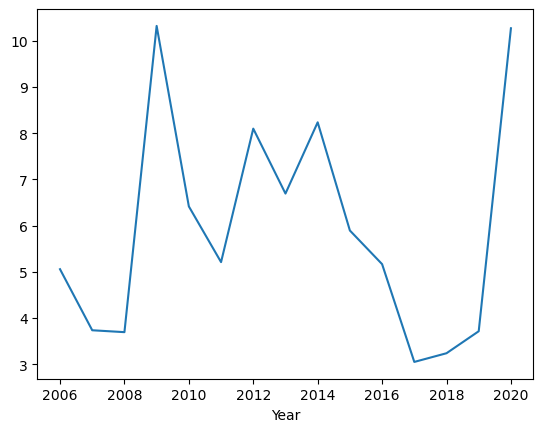

In [52]:
ferrari_prom_posicion_por_ano.plot()

Vemos como le va a ferrari en cada circuito haciendo un promedio de la posicion por circuito

In [53]:
ferari_prom_position_por_circuit = qualys_ferrari.groupby(["Circuit"]).Position.mean()
ferari_prom_position_por_circuit

Circuit
abu-dhabi        7.125000
australia        6.678571
austria          6.400000
azerbaijan       4.333333
bahrain          5.033333
belgium          6.714286
brazil           5.222222
canada           5.423077
china            5.285714
europe           5.687500
france           2.900000
germany          5.541667
great-britain    6.250000
hungary          5.933333
india            5.666667
italy            6.205882
japan            5.535714
malaysia         6.916667
mexico           5.200000
monaco           5.666667
portugal         9.500000
russia           5.142857
san-marino       2.500000
singapore        6.750000
south-korea      5.375000
spain            5.466667
turkey           6.142857
united-states    5.200000
Name: Position, dtype: float64

Grafico de barras que muestra la posicion promedio por circuito. En los circuitos que mejor le fue a ferrari fue en San-marino y france, y en el que peor fue en Portugal.

<AxesSubplot:xlabel='Circuit'>

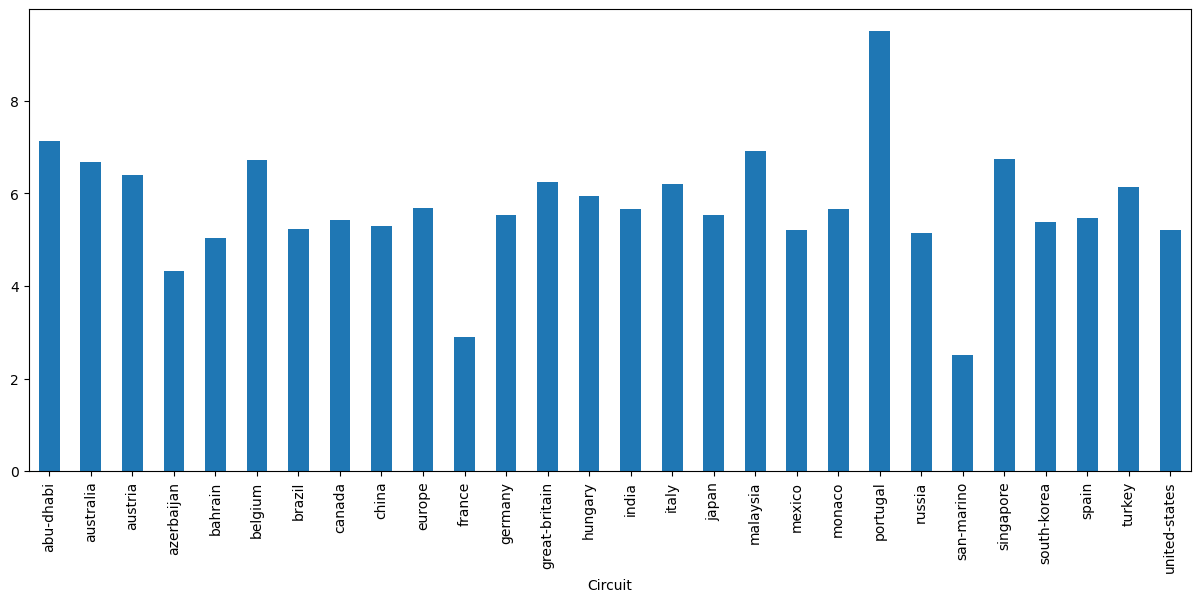

In [125]:
ferari_prom_position_por_circuit.plot.bar()

In [55]:
suma_puntos_ferrari_pilotos= qualys_ferrari.groupby("Name").Position.agg("mean")
suma_puntos_ferrari_pilotos = suma_puntos_ferrari_pilotos.to_frame()
suma_puntos_ferrari_pilotos

,Position
Name,
Charles Leclerc,5.921053
Felipe Massa,6.482014
Fernando Alonso,5.774194
Giancarlo Fisichella,17.600000
Kimi RÃ¤ikkÃ¶nen,5.625000
Luca Badoer,20.000000
Michael Schumacher,4.000000
Sebastian Vettel,4.872881


Hice una lista de los pilotos que mejor les fue en Ferrari liderada por Schumacher y Sebastian Vettel

In [56]:
suma_puntos_ferrari_pilotos.sort_values("Position")

,Position
Name,
Michael Schumacher,4.000000
Sebastian Vettel,4.872881
Kimi RÃ¤ikkÃ¶nen,5.625000
Fernando Alonso,5.774194
Charles Leclerc,5.921053
Felipe Massa,6.482014
Giancarlo Fisichella,17.600000
Luca Badoer,20.000000


In [57]:
qualys = qualys.replace("EX", 0)
qualys = qualys.replace("NC", 0)
qualys = qualys.replace("DQ", 0)
qualys = qualys.replace("RT", 0)
qualys = qualys.astype({"Position": "float64"})

In [58]:
posicion_prom_por_scuderia = qualys.groupby("Scuderia").Position.mean()
posicion_prom_por_scuderia

Scuderia
Alfa Romeo Racing Ferrari    14.078947
AlphaTauri Honda             11.212121
Brawn Mercedes                4.823529
Caterham Renault             19.107143
Ferrari                       5.831560
Force India Ferrari          19.000000
Force India Mercedes         11.327320
HRT Cosworth                 20.842105
Haas Ferrari                 12.994975
Honda                        12.094340
Lotus Cosworth               19.342105
Lotus Mercedes               11.131579
Lotus Renault                12.104575
MF1 Toyota                   18.400000
MRT Mercedes                 17.527778
MRT-Mercedes                 16.666667
Marussia Cosworth            20.324675
Marussia Ferrari             18.439394
McLaren Honda                13.008475
McLaren Mercedes              6.312121
McLaren Renault              11.198276
Mercedes                      4.166276
RBR Ferrari                  13.638889
RBR Renault                   3.521127
Racing Point BWT Mercedes    11.697368
Red Bull Racing 

Vemos las scuderias que mejor les fue en nuestro data frame

In [59]:
posicion_prom_por_scuderia = posicion_prom_por_scuderia.to_frame()
posicion_prom_por_scuderia = posicion_prom_por_scuderia.sort_values("Position")
posicion_prom_por_scuderia

,Position
Scuderia,
RBR Renault,3.521127
Mercedes,4.166276
Brawn Mercedes,4.823529
Red Bull Racing Renault,4.827225
Red Bull Racing Honda,5.466667
Red Bull Racing TAG Heuer,5.764228
Ferrari,5.831560
McLaren Mercedes,6.312121
Toro Rosso-Ferrari,8.333333


Y las mejores 5

In [60]:
posicion_prom_por_scuderia.head(5)

,Position
Scuderia,
RBR Renault,3.521127
Mercedes,4.166276
Brawn Mercedes,4.823529
Red Bull Racing Renault,4.827225
Red Bull Racing Honda,5.466667


Las peores 5

In [61]:
posicion_prom_por_scuderia.tail(5)

,Position
Scuderia,
Lotus Cosworth,19.342105
Marussia Cosworth,20.324675
Virgin Cosworth,20.381579
HRT Cosworth,20.842105
Spyker Ferrari,21.264706


In [62]:
qualys = qualys.replace("EX", 0)
qualys = qualys.replace("NC", 0)
qualys = qualys.replace("DQ", 0)
qualys = qualys.replace("RT", 0)
qualys = qualys.astype({"Position": "float64"})

In [63]:
posicion_prom_por_piloto = qualys.groupby("Name").Position.agg("mean").to_frame()
posicion_prom_por_piloto

,Position
Name,
Adrian Sutil,14.843750
Alexander Albon,9.000000
Alexander Rossi,14.800000
Alexander Wurz,15.687500
Andre Lotterer,21.000000
...,...
Valtteri Bottas,5.903846
Vitaly Petrov,14.649123
Vitantonio Liuzzi,16.328947


Segun los datos que tenemos estos son los mejores 10 pilotos, o los que mejor les fue en promedio de sus carreras

In [64]:
top10=posicion_prom_por_piloto.sort_values("Position").head(10)
top10

,Position
Name,
Lewis Hamilton,3.215909
Sebastian Vettel,4.854902
Max Verstappen,5.555556
Valtteri Bottas,5.903846
Mark Webber,6.321918
Nico Rosberg,6.684729
Kimi RÃ¤ikkÃ¶nen,7.151639
Felipe Massa,7.373272
Juan Pablo Montoya,7.666667


<AxesSubplot:xlabel='Name'>

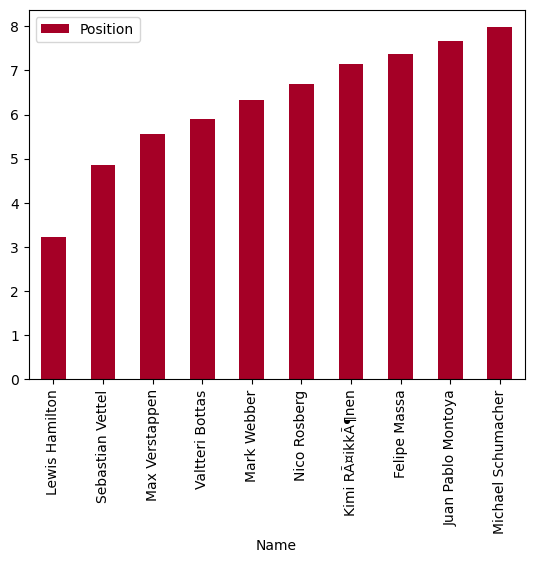

In [65]:
top10.plot.bar(color = ("#a50026"))

Filtro por los que salieron primeros

In [66]:
primer_puesto = qualys[qualys.Position==1]
primer_puesto

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps,mejora
0,2006,1.0,5,bahrain,Michael Schumacher,MSC,Ferrari,93.310,92.025,91.431,20,1.879
22,2006,1.0,2,malaysia,Giancarlo Fisichella,FIS,Renault,95.488,93.623,93.840,22,1.648
44,2006,1.0,12,australia,Jenson Button,BUT,Honda,88.081,86.337,85.229,25,2.852
66,2006,1.0,5,san-marino,Michael Schumacher,MSC,Ferrari,84.598,82.579,82.795,22,1.803
88,2006,1.0,1,europe,Fernando Alonso,ALO,Renault,91.138,90.336,89.819,20,1.319
...,...,...,...,...,...,...,...,...,...,...,...,...
5989,2020,1.0,77,italy,Valtteri Bottas,BOT,Mercedes,74.221,74.585,73.609,22,0.612
6009,2020,1.0,18,turkey,Lance Stroll,STR,Racing Point BWT Mercedes,127.467,113.372,107.765,22,19.702
6029,2020,1.0,44,bahrain,Lewis Hamilton,HAM,Mercedes,88.343,87.586,87.264,16,1.079
6049,2020,1.0,77,bahrain,Valtteri Bottas,BOT,Mercedes,53.904,53.803,53.377,24,0.527


Agrupo para ver los equipos que salieron primeros y cuales salieron primeros mas veces. Para que se vea mejor el grafico saco los equipos que solo salieron primeros una vez.

In [67]:
primer_puesto_por_scuderia = primer_puesto.groupby("Scuderia").Position.sum()
primer_puesto_por_scuderia = pd.DataFrame(primer_puesto_por_scuderia)
primer_puesto_por_scuderia = primer_puesto_por_scuderia.sort_values("Position", ascending=False)
primer_puesto_por_scuderia = primer_puesto_por_scuderia[primer_puesto_por_scuderia.Position != 1]
primer_puesto_por_scuderia




,Position
Scuderia,
Mercedes,118.0
Ferrari,48.0
Red Bull Racing Renault,36.0
McLaren Mercedes,33.0
RBR Renault,20.0
Renault,8.0
Brawn Mercedes,5.0
Red Bull Racing Honda,4.0
Red Bull Racing TAG Heuer,3.0


Este grafico de tortas nos muestra como Mercedes fue la escuderia que lidero durante el dataset que tenemos, seguida por ferrari

array([<AxesSubplot:ylabel='Position'>], dtype=object)

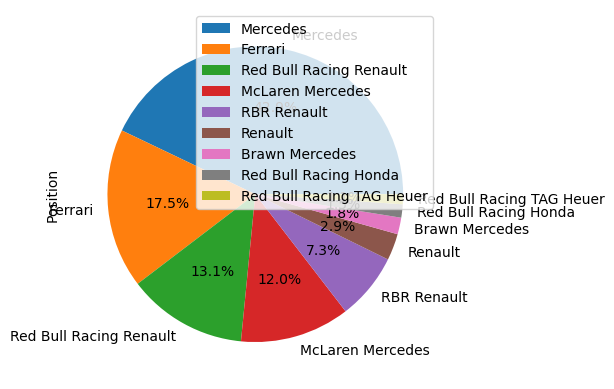

In [68]:
primer_puesto_por_scuderia.plot.pie(subplots=True, autopct='%1.1f%%')

In [69]:
qualys.groupby(["Circuit","Year","Name"]).Q1.agg("unique").to_frame()

Q1
Circuit       Year Name                                      
abu-dhabi     2009 Adrian Sutil                     [101.863]
                   Fernando Alonso                  [101.667]
                   Giancarlo Fisichella             [102.184]
                   Heikki Kovalainen     [100.80799999999999]
                   Jaime Alguersuari                [101.503]
...                                                       ...
united-states 2019 Robert Kubica          [95.88900000000001]
                   Romain Grosjean                   [94.161]
                   Sebastian Vettel       [93.76599999999999]
                   Sergio Perez           [95.80799999999999]
                   Valtteri Bottas                    [93.75]

[5974 rows x 1 columns]

Hago un grafico para ver la cantidad de carreras que corrio cada piloto de Ferrari

Text(0.5, 1.0, 'Distribución de Pilotos Ferrari')

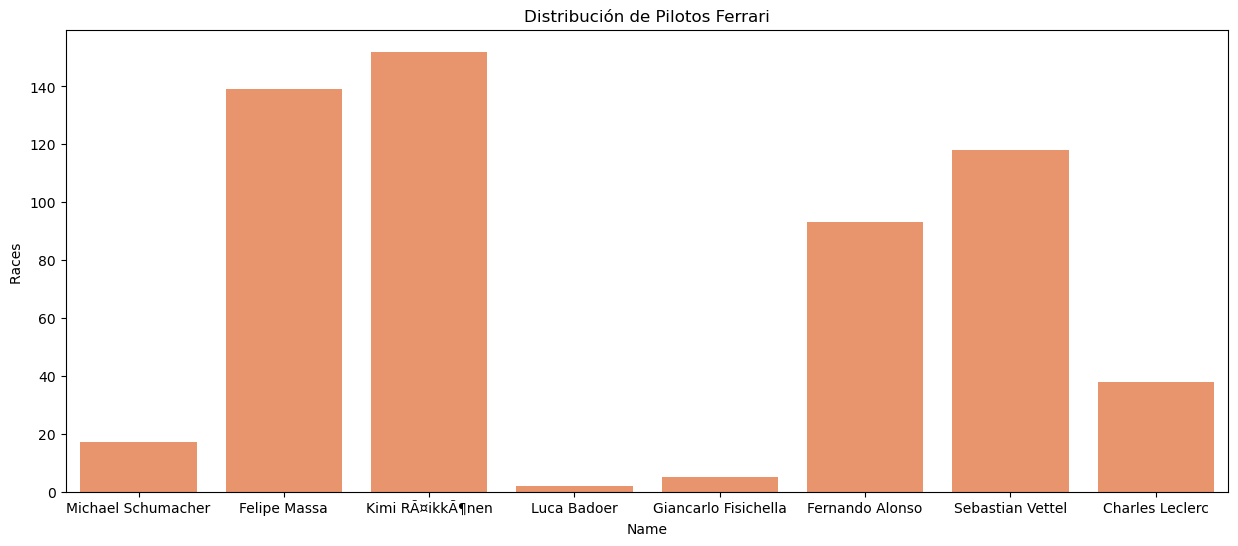

In [70]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6
sns.countplot(x = 'Name', data = qualys_ferrari,color = "#fc8d59")
plt.xlabel("Name")
plt.ylabel("Races ")
plt.title("Distribución de Pilotos Ferrari")

In [71]:
qualys

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps,mejora
0,2006,1.0,5,bahrain,Michael Schumacher,MSC,Ferrari,93.310,92.025,91.431,20,1.879
1,2006,2.0,6,bahrain,Felipe Massa,MAS,Ferrari,93.579,92.014,91.478,20,2.101
2,2006,3.0,12,bahrain,Jenson Button,BUT,Honda,92.603,92.025,91.549,23,1.054
3,2006,4.0,1,bahrain,Fernando Alonso,ALO,Renault,92.433,91.215,91.702,20,0.731
4,2006,5.0,4,bahrain,Juan Pablo Montoya,MOY,McLaren Mercedes,93.233,91.487,92.164,20,1.069
...,...,...,...,...,...,...,...,...,...,...,...,...
6084,2020,16.0,7,abu-dhabi,Kimi RÃ¤ikkÃ¶nen,RAI,Alfa Romeo Racing Ferrari,97.555,0.000,0.000,6,97.555
6085,2020,17.0,20,abu-dhabi,Kevin Magnussen,MAG,Haas Ferrari,97.863,0.000,0.000,9,97.863
6086,2020,18.0,63,abu-dhabi,George Russell,RUS,Williams Mercedes,98.045,0.000,0.000,8,98.045
6087,2020,19.0,51,abu-dhabi,Pietro Fittipaldi,FIT,Haas Ferrari,98.173,0.000,0.000,9,98.173


## Ploteo y Escalado

In [72]:
numericas = qualys.select_dtypes(exclude=['object']).columns
numericas

Index(['Year', 'Position', 'Driver No.', 'Q1', 'Q2', 'Q3', 'Laps', 'mejora'], dtype='object')

<AxesSubplot:title={'center':'Boxplot deQ1'}, xlabel='Q1'>

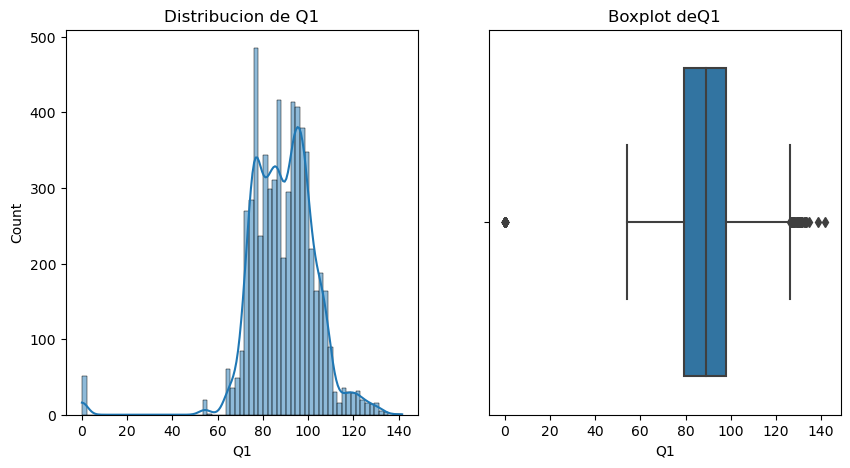

In [73]:
variable = 'Q1'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = qualys, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = qualys, x = f"{variable}", ax=ax[1])

Esta variable cuenta con outliers, y pareceria tener una distribucion normal, por lo tanto aplicamos un escalado robusto

In [74]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
qualys['Q1'] = rb_scaler.fit_transform(qualys[['Q1']])
qualys.head()

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps,mejora
0,2006,1.0,5,bahrain,Michael Schumacher,MSC,Ferrari,0.231249,92.025,91.431,20,1.879
1,2006,2.0,6,bahrain,Felipe Massa,MAS,Ferrari,0.245599,92.014,91.478,20,2.101
2,2006,3.0,12,bahrain,Jenson Button,BUT,Honda,0.193535,92.025,91.549,23,1.054
3,2006,4.0,1,bahrain,Fernando Alonso,ALO,Renault,0.184466,91.215,91.702,20,0.731
4,2006,5.0,4,bahrain,Juan Pablo Montoya,MOY,McLaren Mercedes,0.227142,91.487,92.164,20,1.069


<AxesSubplot:title={'center':'Boxplot deQ2'}, xlabel='Q2'>

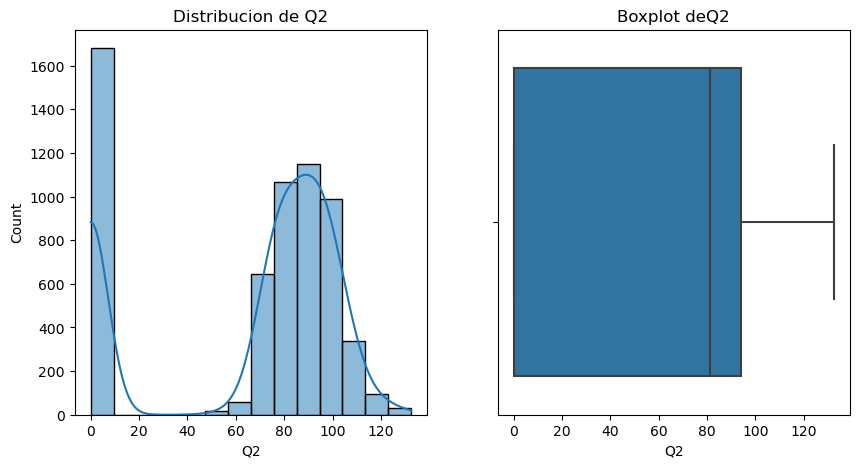

In [75]:
variable = 'Q2'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = qualys, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = qualys, x = f"{variable}", ax=ax[1])

Esta distribucion es normal y no tiene outliers, asi que le hacemos una Standard

In [76]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
qualys['Q2'] = std_scaler.fit_transform(qualys[['Q2']])
qualys.head()

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps,mejora
0,2006,1.0,5,bahrain,Michael Schumacher,MSC,Ferrari,0.231249,0.679965,91.431,20,1.879
1,2006,2.0,6,bahrain,Felipe Massa,MAS,Ferrari,0.245599,0.679697,91.478,20,2.101
2,2006,3.0,12,bahrain,Jenson Button,BUT,Honda,0.193535,0.679965,91.549,23,1.054
3,2006,4.0,1,bahrain,Fernando Alonso,ALO,Renault,0.184466,0.660225,91.702,20,0.731
4,2006,5.0,4,bahrain,Juan Pablo Montoya,MOY,McLaren Mercedes,0.227142,0.666854,92.164,20,1.069


<AxesSubplot:title={'center':'Boxplot deQ3'}, xlabel='Q3'>

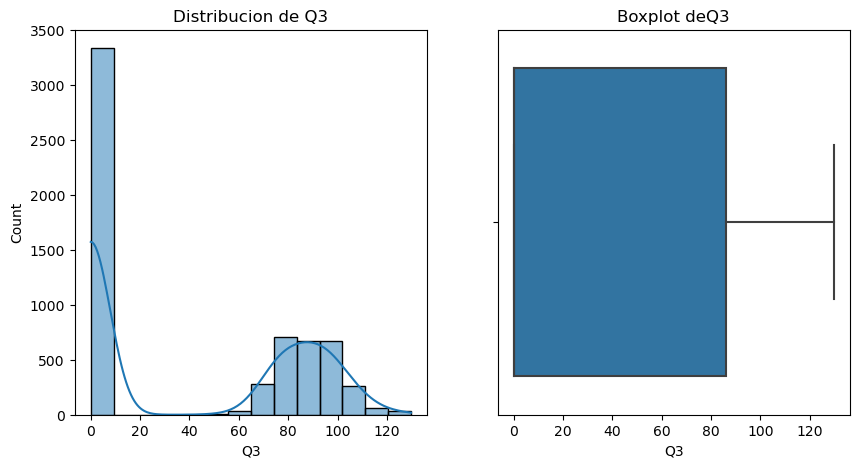

In [77]:
variable = 'Q3'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = qualys, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = qualys, x = f"{variable}", ax=ax[1])

Lo mismo para Q3, es una normal sin outliers, hacemos standard

In [78]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
qualys['Q3'] = std_scaler.fit_transform(qualys[['Q3']])
qualys.head()

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps,mejora
0,2006,1.0,5,bahrain,Michael Schumacher,MSC,Ferrari,0.231249,0.679965,1.153788,20,1.879
1,2006,2.0,6,bahrain,Felipe Massa,MAS,Ferrari,0.245599,0.679697,1.154837,20,2.101
2,2006,3.0,12,bahrain,Jenson Button,BUT,Honda,0.193535,0.679965,1.156423,23,1.054
3,2006,4.0,1,bahrain,Fernando Alonso,ALO,Renault,0.184466,0.660225,1.159841,20,0.731
4,2006,5.0,4,bahrain,Juan Pablo Montoya,MOY,McLaren Mercedes,0.227142,0.666854,1.170160,20,1.069


<AxesSubplot:title={'center':'Boxplot deLaps'}, xlabel='Laps'>

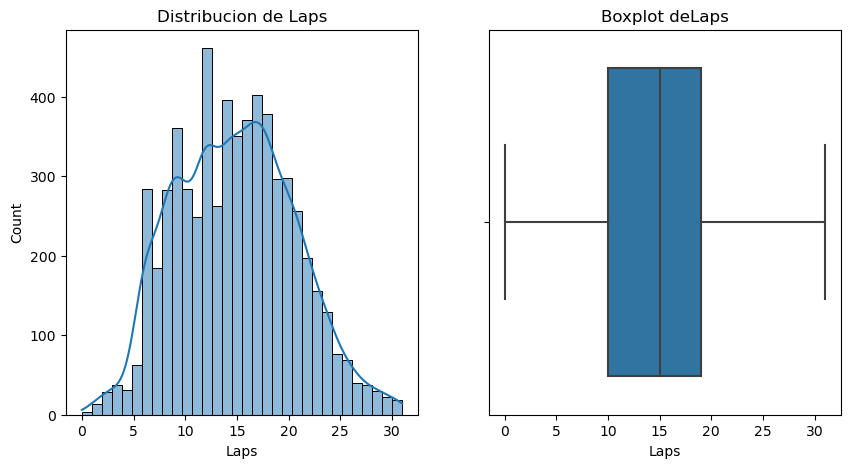

In [79]:
variable = 'Laps'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = qualys, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = qualys, x = f"{variable}", ax=ax[1])

<AxesSubplot:title={'center':'Boxplot demejora'}, xlabel='mejora'>

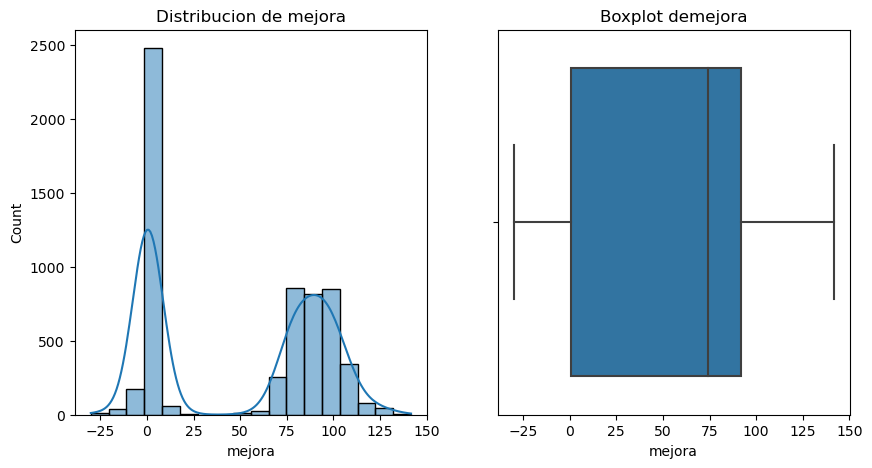

In [80]:
variable = 'mejora'

fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].set_title(f"Distribucion de {variable}")
sns.histplot(data = qualys, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot de{variable}")
sns.boxplot(data = qualys, x = f"{variable}", ax=ax[1])

In [81]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
qualys['mejora'] = std_scaler.fit_transform(qualys[['mejora']])
qualys.head()

,Year,Position,Driver No.,Circuit,Name,NameTag,Scuderia,Q1,Q2,Q3,Laps,mejora
0,2006,1.0,5,bahrain,Michael Schumacher,MSC,Ferrari,0.231249,0.679965,1.153788,20,-1.030764
1,2006,2.0,6,bahrain,Felipe Massa,MAS,Ferrari,0.245599,0.679697,1.154837,20,-1.025931
2,2006,3.0,12,bahrain,Jenson Button,BUT,Honda,0.193535,0.679965,1.156423,23,-1.048725
3,2006,4.0,1,bahrain,Fernando Alonso,ALO,Renault,0.184466,0.660225,1.159841,20,-1.055757
4,2006,5.0,4,bahrain,Juan Pablo Montoya,MOY,McLaren Mercedes,0.227142,0.666854,1.170160,20,-1.048398


## Variables Categoricas

In [82]:
qualys.columns

Index(['Year', 'Position', 'Driver No.', 'Circuit', 'Name', 'NameTag',
       'Scuderia', 'Q1', 'Q2', 'Q3', 'Laps', 'mejora'],
      dtype='object')

In [83]:
print(f"Los valores unicos de Circuit son {qualys.Circuit.unique()}")

Los valores unicos de Circuit son ['bahrain' 'malaysia' 'australia' 'san-marino' 'europe' 'spain' 'monaco'
 'great-britain' 'canada' 'united-states' 'france' 'germany' 'hungary'
 'turkey' 'italy' 'china' 'japan' 'brazil' 'belgium' 'singapore'
 'abu-dhabi' 'south-korea' 'india' 'austria' 'russia' 'mexico'
 'azerbaijan' 'portugal']


In [84]:
print(f"Los valores unicos de Name son {qualys.Name.unique()}")

Los valores unicos de Name son ['Michael Schumacher' 'Felipe Massa' 'Jenson Button' 'Fernando Alonso'
 'Juan Pablo Montoya' 'Rubens Barrichello' 'Mark Webber' 'Christian Klien'
 'Giancarlo Fisichella' 'Nick Heidfeld' 'Jacques Villeneuve'
 'Nico Rosberg' 'David Coulthard' 'Jarno Trulli' 'Vitantonio Liuzzi'
 'Scott Speed' 'Ralf Schumacher' 'Christijan Albers' 'Tiago Monteiro'
 'Takuma Sato' 'Yuji Ide' 'Kimi RÃ¤ikkÃ¶nen' 'Franck Montagny'
 'Pedro de la Rosa' 'Sakon Yamamoto' 'Robert Kubica' 'Robert Doornbos'
 'Lewis Hamilton' 'Anthony Davidson' 'Heikki Kovalainen' 'Alexander Wurz'
 'Adrian Sutil' 'Sebastian Vettel' 'Markus Winkelhock' 'Kazuki Nakajima'
 'Timo Glock' 'Sebastien Bourdais' 'Nelson Piquet' 'Sebastien Buemi'
 'Jaime Alguersuari' 'Romain Grosjean' 'Luca Badoer' 'Kamui Kobayashi'
 'Nico Hulkenberg' 'Vitaly Petrov' 'Lucas di Grassi' 'Bruno Senna'
 'Karun Chandhok' 'Sergio Perez' 'Paul di Resta' 'Pastor Maldonado'
 "Jerome d'Ambrosio" 'Narain Karthikeyan' 'Daniel Ricciardo'
 'Jean

In [85]:
print(f"Los valores unicos de Name Tag son {qualys.NameTag.unique()}")

Los valores unicos de Name Tag son ['MSC' 'MAS' 'BUT' 'ALO' 'MOY' 'BAR' 'WEB' 'KLI' 'FIS' 'HEI' 'VIL' 'ROS'
 'COU' 'TRU' 'LIU' 'SPE' 'RSC' 'ALB' 'MON' 'SAT' 'IDE' 'RAI' 'DLR' 'YAM'
 'KUB' 'DOO' 'HAM' 'DAV' 'KOV' 'WUR' 'SUT' 'VET' 'WIN' 'NAK' 'GLO' 'BOU'
 'PIQ' 'BUE' 'ALG' 'GRO' 'BAD' 'KOB' 'HUL' 'PET' 'DIG' 'SEN' 'CHD' 'PER'
 'DIR' 'MAL' 'DAM' 'KAR' 'RIC' 'VER' 'PIC' 'BOT' 'GUT' 'BIA' 'CHI' 'VDG'
 'MAG' 'KVY' 'ERI' 'LOT' 'STE' 'SAI' 'NAS' 'MER' 'RSI' 'PAL' 'HAR' 'WEH'
 'VAN' 'OCO' 'GIO' 'STR' 'GAS' 'LEC' 'SIR' 'NOR' 'RUS' 'LAT' 'AIT' 'FIT']


In [86]:
print(f"Los valores unicos de Scuderia son {qualys.Scuderia.unique()}")

Los valores unicos de Scuderia son ['Ferrari' 'Honda' 'Renault' 'McLaren Mercedes' 'Williams Cosworth'
 'RBR Ferrari' 'Sauber BMW' 'Toyota' 'STR Cosworth' 'MF1 Toyota'
 'Super Aguri Honda' 'Red Bull Renault' 'Williams Toyota' 'STR Ferrari'
 'Spyker Ferrari' 'Force India Ferrari' 'Brawn Mercedes' 'RBR Renault'
 'Force India Mercedes' 'Mercedes' 'Sauber Ferrari' 'Virgin Cosworth'
 'Lotus Cosworth' 'HRT Cosworth' 'Red Bull Racing Renault' 'Lotus Renault'
 'Williams Renault' 'Caterham Renault' 'Marussia Cosworth' 'STR Renault'
 'Williams Mercedes' 'Marussia Ferrari' 'Lotus Mercedes' 'McLaren Honda'
 'Toro Rosso-Ferrari' 'Red Bull Racing TAG Heuer' 'Haas Ferrari'
 'MRT-Mercedes' 'Toro Rosso Ferrari' 'MRT Mercedes' 'Toro Rosso'
 'McLaren Renault' 'Scuderia Toro Rosso Honda' 'Red Bull Racing Honda'
 'Alfa Romeo Racing Ferrari' 'Racing Point BWT Mercedes'
 'AlphaTauri Honda']


Hago un heat map para ver las correlaciones entre las distintas variables del dataset

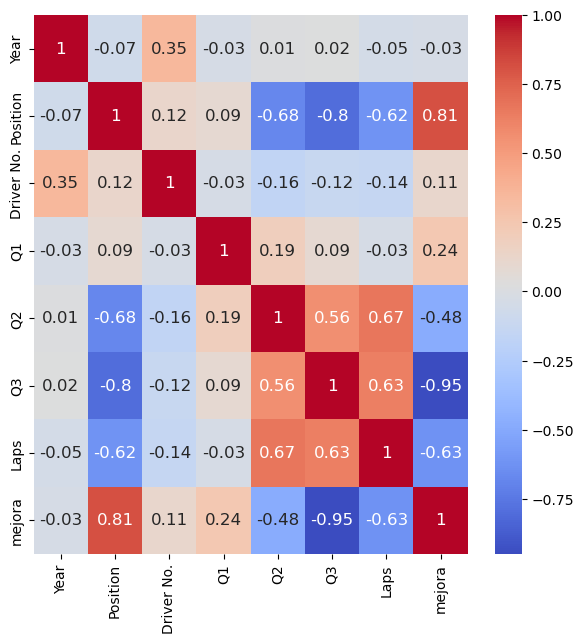

In [87]:
plt.figure(figsize = (7,7))
sns.heatmap(round(qualys.corr(),2), cmap = "coolwarm", annot = True, annot_kws = {"size":12});

Son multicategoricas asi que vamos a usar One Hot Encoder

In [88]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
ohe.fit(qualys[['Name']])
display(ohe.categories_)
display(ohe.get_feature_names_out())
Name_encoded = ohe.transform(qualys[['Name']])

qualys[ohe.get_feature_names_out()] = Name_encoded


qualys.drop(columns='Name', inplace = True)

qualys

[array(['Adrian Sutil', 'Alexander Albon', 'Alexander Rossi',
        'Alexander Wurz', 'Andre Lotterer', 'Anthony Davidson',
        'Antonio Giovinazzi', 'Brendon Hartley', 'Bruno Senna',
        'Carlos Sainz', 'Charles Leclerc', 'Charles Pic',
        'Christian Klien', 'Christijan Albers', 'Daniel Ricciardo',
        'Daniil Kvyat', 'David Coulthard', 'Esteban Gutierrez',
        'Esteban Ocon', 'Felipe Massa', 'Felipe Nasr', 'Fernando Alonso',
        'Franck Montagny', 'George Russell', 'Giancarlo Fisichella',
        'Giedo van der Garde', 'Heikki Kovalainen', 'Jack Aitken',
        'Jacques Villeneuve', 'Jaime Alguersuari', 'Jarno Trulli',
        'Jean-Eric Vergne', 'Jenson Button', "Jerome d'Ambrosio",
        'Jolyon Palmer', 'Juan Pablo Montoya', 'Jules Bianchi',
        'Kamui Kobayashi', 'Karun Chandhok', 'Kazuki Nakajima',
        'Kevin Magnussen', 'Kimi RÃ¤ikkÃ¶nen', 'Lance Stroll',
        'Lando Norris', 'Lewis Hamilton', 'Luca Badoer', 'Lucas di Grassi',
        'M

array(['Name_Adrian Sutil', 'Name_Alexander Albon',
       'Name_Alexander Rossi', 'Name_Alexander Wurz',
       'Name_Andre Lotterer', 'Name_Anthony Davidson',
       'Name_Antonio Giovinazzi', 'Name_Brendon Hartley',
       'Name_Bruno Senna', 'Name_Carlos Sainz', 'Name_Charles Leclerc',
       'Name_Charles Pic', 'Name_Christian Klien',
       'Name_Christijan Albers', 'Name_Daniel Ricciardo',
       'Name_Daniil Kvyat', 'Name_David Coulthard',
       'Name_Esteban Gutierrez', 'Name_Esteban Ocon', 'Name_Felipe Massa',
       'Name_Felipe Nasr', 'Name_Fernando Alonso', 'Name_Franck Montagny',
       'Name_George Russell', 'Name_Giancarlo Fisichella',
       'Name_Giedo van der Garde', 'Name_Heikki Kovalainen',
       'Name_Jack Aitken', 'Name_Jacques Villeneuve',
       'Name_Jaime Alguersuari', 'Name_Jarno Trulli',
       'Name_Jean-Eric Vergne', 'Name_Jenson Button',
       "Name_Jerome d'Ambrosio", 'Name_Jolyon Palmer',
       'Name_Juan Pablo Montoya', 'Name_Jules Bianchi',
     

,Year,Position,Driver No.,Circuit,NameTag,Scuderia,Q1,Q2,Q3,Laps,...,Name_Sergio Perez,Name_Stoffel Vandoorne,Name_Takuma Sato,Name_Tiago Monteiro,Name_Timo Glock,Name_Valtteri Bottas,Name_Vitaly Petrov,Name_Vitantonio Liuzzi,Name_Will Stevens,Name_Yuji Ide
0,2006,1.0,5,bahrain,MSC,Ferrari,0.231249,0.679965,1.153788,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2006,2.0,6,bahrain,MAS,Ferrari,0.245599,0.679697,1.154837,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006,3.0,12,bahrain,BUT,Honda,0.193535,0.679965,1.156423,23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2006,4.0,1,bahrain,ALO,Renault,0.184466,0.660225,1.159841,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2006,5.0,4,bahrain,MOY,McLaren Mercedes,0.227142,0.666854,1.170160,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6084,2020,16.0,7,abu-dhabi,RAI,Alfa Romeo Racing Ferrari,0.457698,-1.562678,-0.888388,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6085,2020,17.0,20,abu-dhabi,MAG,Haas Ferrari,0.474128,-1.562678,-0.888388,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6086,2020,18.0,63,abu-dhabi,RUS,Williams Mercedes,0.483837,-1.562678,-0.888388,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6087,2020,19.0,51,abu-dhabi,FIT,Haas Ferrari,0.490665,-1.562678,-0.888388,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Armemos nuestro Modelo

In [89]:
qualys.columns

Index(['Year', 'Position', 'Driver No.', 'Circuit', 'NameTag', 'Scuderia',
       'Q1', 'Q2', 'Q3', 'Laps', 'mejora', 'Name_Adrian Sutil',
       'Name_Alexander Albon', 'Name_Alexander Rossi', 'Name_Alexander Wurz',
       'Name_Andre Lotterer', 'Name_Anthony Davidson',
       'Name_Antonio Giovinazzi', 'Name_Brendon Hartley', 'Name_Bruno Senna',
       'Name_Carlos Sainz', 'Name_Charles Leclerc', 'Name_Charles Pic',
       'Name_Christian Klien', 'Name_Christijan Albers',
       'Name_Daniel Ricciardo', 'Name_Daniil Kvyat', 'Name_David Coulthard',
       'Name_Esteban Gutierrez', 'Name_Esteban Ocon', 'Name_Felipe Massa',
       'Name_Felipe Nasr', 'Name_Fernando Alonso', 'Name_Franck Montagny',
       'Name_George Russell', 'Name_Giancarlo Fisichella',
       'Name_Giedo van der Garde', 'Name_Heikki Kovalainen',
       'Name_Jack Aitken', 'Name_Jacques Villeneuve', 'Name_Jaime Alguersuari',
       'Name_Jarno Trulli', 'Name_Jean-Eric Vergne', 'Name_Jenson Button',
       'Name_Jerome

Ahora voy a proceder a hacer mi modelo. Para predecir la mejora en los tiempos que se hace. La mejora es el tiempo de la Q1 - Q3, y eso representa lo que mejoro cada piloto en su primer mejor vuelta y su última mejor vuelta. Voy a hacer una regresión lineal ya que la idea es predecir un número que es el tiempo de mejora y quiero acercarme lo más posible a ese número.
Mi variable dependiente va a ser mejora, mientras que el resto serán todas las variables independientes. Solo consideraremos las que tienen influencia que son: Laps, Position, Q1,Q2,Q3.
Podemos entender que depende de como le fue en los distintos Qualys, cuanto pudo haber mejorado, también depende la cantidad de vueltas que dio y la posición en la que quedo.
La predicción de cuanto mejora cada piloto permitirá analizar que pilotos rinden más al final, cuales pilotos siempre rinden más o menos al mismo nivel sin tener una gran mejoría en sus tiempos.


Defino mis features y elijo Position,Laps y Q2, ya que la mejora es Q1-Q3 decido no tenerlas en cuenta para el modelo

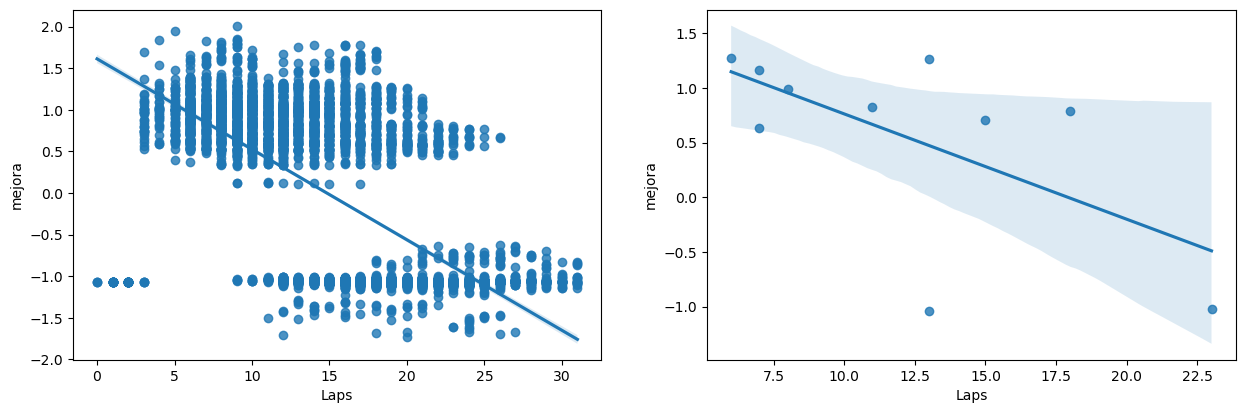

In [90]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.regplot(x='Laps', y='mejora', data=qualys, ci=95)
plt.subplot(2,2,2)
sns.regplot(x='Laps', y='mejora', data=qualys.sample(10, random_state=6), ci=95);

In [91]:
features = ['Position','Laps','Q2']

Mi formula hace que las features que defini se sumen al modelo

In [92]:
formula = "mejora ~ " + ' + '.join(features)

In [93]:
import statsmodels.formula.api as smf
model4a = smf.ols(formula = formula, data = qualys).fit()
print(model4a.summary())

                            OLS Regression Results                            
Dep. Variable:                 mejora   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     4962.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:29:53   Log-Likelihood:                -4842.8
No. Observations:                6063   AIC:                             9694.
Df Residuals:                    6059   BIC:                             9720.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6073      0.035    -17.189      0.0

---
 R-squared es bastante alto, un poco mas del 70% de las variaciones de mejora se explican por las variaciones combinadas de mis features que son Position,Laps y Q2



In [94]:
qualys_standardized = qualys.copy()
for f in features:
    mu = qualys[f].mean()
    sigma = qualys[f].std()
    qualys_standardized[f] = qualys[f].map(lambda x: (x - mu) / sigma)
qualys_standardized

,Year,Position,Driver No.,Circuit,NameTag,Scuderia,Q1,Q2,Q3,Laps,...,Name_Sergio Perez,Name_Stoffel Vandoorne,Name_Takuma Sato,Name_Tiago Monteiro,Name_Timo Glock,Name_Valtteri Bottas,Name_Vitaly Petrov,Name_Vitantonio Liuzzi,Name_Will Stevens,Name_Yuji Ide
0,2006,-1.592857,5,bahrain,MSC,Ferrari,0.231249,0.679909,1.153788,0.896592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2006,-1.433760,6,bahrain,MAS,Ferrari,0.245599,0.679641,1.154837,0.896592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006,-1.274664,12,bahrain,BUT,Honda,0.193535,0.679909,1.156423,1.416339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2006,-1.115567,1,bahrain,ALO,Renault,0.184466,0.660171,1.159841,0.896592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2006,-0.956470,4,bahrain,MOY,McLaren Mercedes,0.227142,0.666799,1.170160,0.896592,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6084,2020,0.793595,7,abu-dhabi,RAI,Alfa Romeo Racing Ferrari,0.457698,-1.562549,-0.888388,-1.528896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6085,2020,0.952691,20,abu-dhabi,MAG,Haas Ferrari,0.474128,-1.562549,-0.888388,-1.009148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6086,2020,1.111788,63,abu-dhabi,RUS,Williams Mercedes,0.483837,-1.562549,-0.888388,-1.182397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6087,2020,1.270885,51,abu-dhabi,FIT,Haas Ferrari,0.490665,-1.562549,-0.888388,-1.009148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
formula = "mejora ~ " + ' + '.join(features)
formula

'mejora ~ Position + Laps + Q2'

In [96]:
model4 = smf.ols(formula = formula, data = qualys_standardized).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 mejora   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     4962.
Date:                Wed, 07 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:29:53   Log-Likelihood:                -4842.8
No. Observations:                6063   AIC:                             9694.
Df Residuals:                    6059   BIC:                             9720.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.648e-17      0.007   2.39e-15      1.0

<AxesSubplot:>

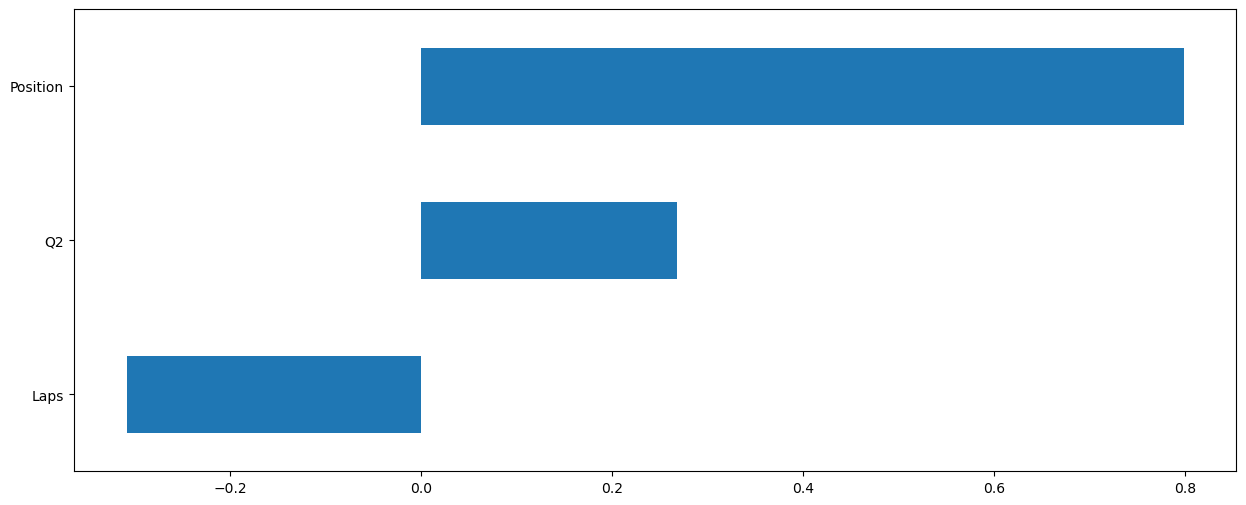

In [97]:
model4.params[1:].sort_values().plot(kind='barh')

In [98]:
predicted_mejora = model4.predict(qualys_standardized[features])
residuals = predicted_mejora - qualys_standardized.mejora

Saco mis residuos haciendo la diferencia entre la prediccion de la mejora y la mejora original ya estandarizada

In [99]:
residuals

0      -0.335346
1      -0.213195
2      -0.223509
3       0.065522
4       0.186998
          ...   
6084   -0.366193
6085   -0.406079
6086   -0.229572
6087   -0.158715
6088    0.069289
Length: 6063, dtype: float64

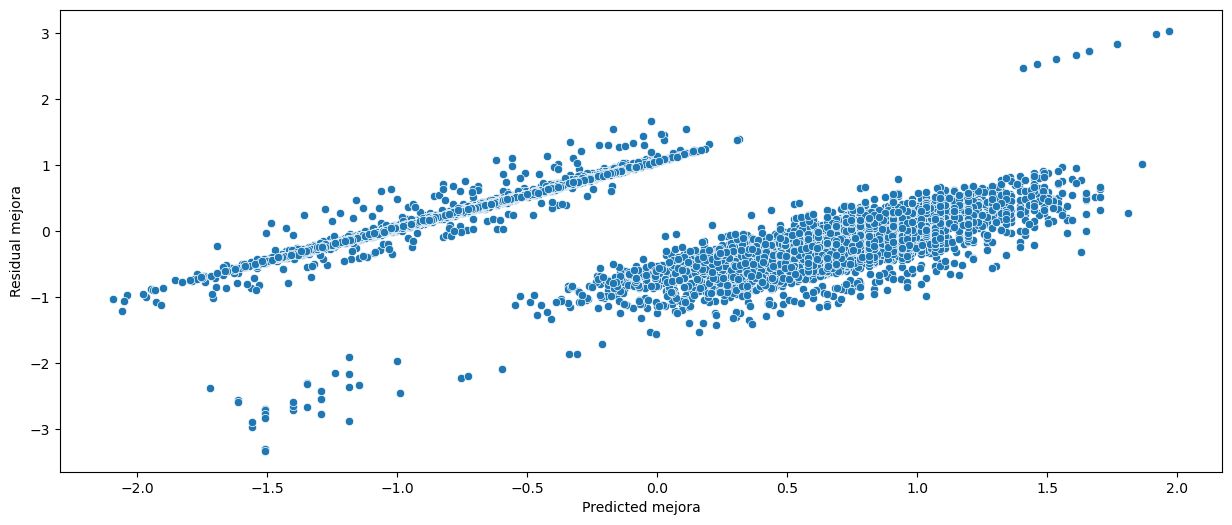

In [100]:
# Check with Residuals vs. Fitted scatterplot
sns.scatterplot(x=predicted_mejora, y=residuals)
plt.xlabel('Predicted mejora')
plt.ylabel('Residual mejora');

Text(0.5, 1.0, 'residuals density plot')

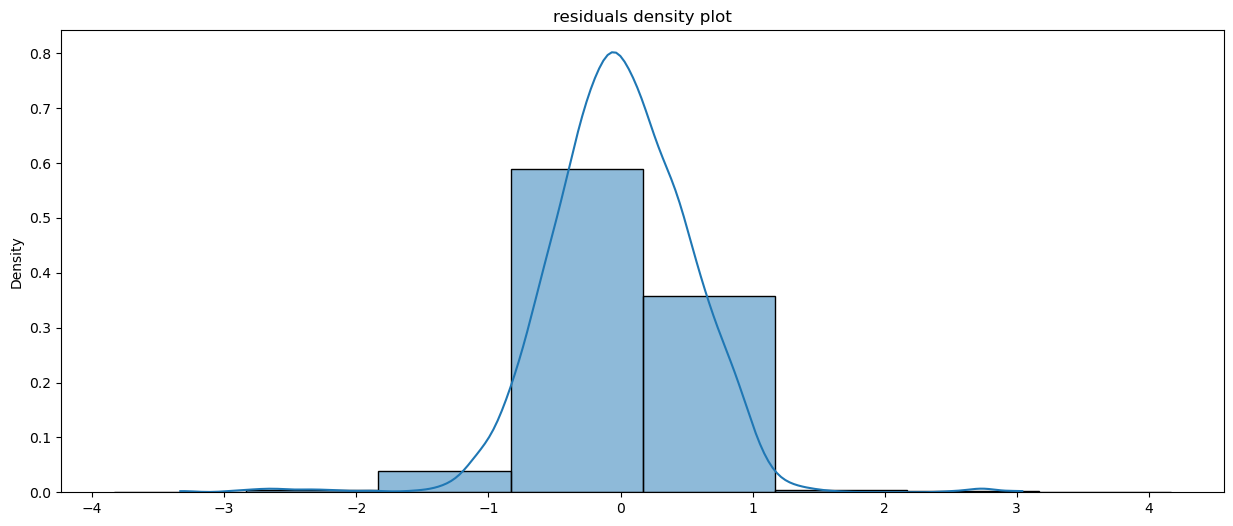

In [101]:
sns.histplot(residuals, kde=True, stat='density', discrete=True)
plt.title('residuals density plot')

Aca vemos un grafico que compara la mejora predecida y la mejora real

Text(0.5, 1.0, 'distribution of predicted and actual values')

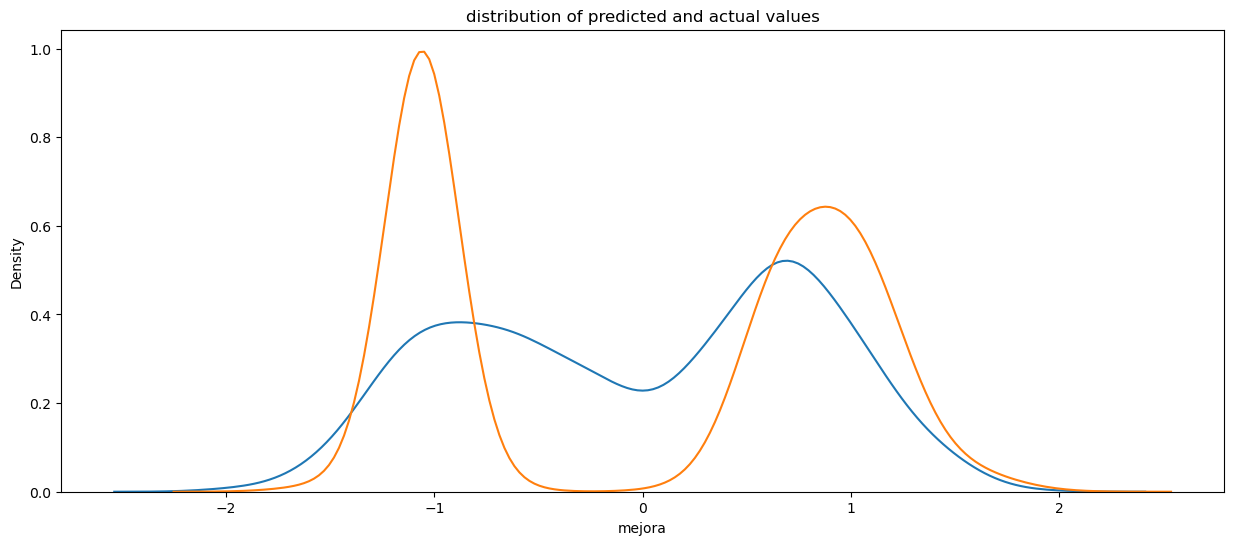

In [102]:
sns.kdeplot(predicted_mejora, label='predicted mejora')
sns.kdeplot(qualys.mejora, label = 'actual mejora')
plt.title('distribution of predicted and actual values')

In [103]:
from metricas_lineal import RMSLE
from metricas_lineal import MAPE
from metricas_lineal import MAE


Este error representa el Root Mean Squared Log Error que mide la relacion entre lo que predecimos y lo actual.

In [104]:
errorrmse = RMSLE(qualys_standardized.mejora,predicted_mejora)
errorrmse

C:\Users\Nacho\anaconda3\envs\pythonProject2\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.3434136770125183

El MAPE es el Mean Absolute Percentage Error, es una medida estadística para definir la precisión de un algoritmo de aprendizaje automático. Nos estima la precisión en términos de las diferencias en los valores reales vs estimados.

In [105]:
MAPE(qualys_standardized.mejora,predicted_mejora)

0.072874955327167

El MAE es el Mean Absolute Error. Mide las diferencias promedio entre los valores predecidos y los valores reales.

In [106]:
MAE(qualys_standardized.mejora,predicted_mejora)

0.4078920901598722

Está bueno observar como si dejo Q1 y Q3 para hacer el accuracy me va a tirar un número muy cercano a 100%, ya que "mejora" depende directamente de estos dos. Pero cuando los saco de la predicción el número cae notablemente, se ve aca:

Aca uso en X:Laps, Q2 y position y en Y: mejora. Y me da un 69% de accuracy

In [109]:
# Create the reduced feature set and target
from sklearn.model_selection import cross_validate
df_reduced = qualys.sample(n=500, random_state=1)
X_reduced = df_reduced[['Laps','Q2','Position',]]
y_reduced = df_reduced['mejora']

# 5-Fold Cross validate model
cv_results =cross_validate(LinearRegression(), X_reduced, y_reduced, cv=5)

# Mean of accuracies
reduced_training_accuracy = cv_results['test_score'].mean()

reduced_training_accuracy

0.6933676035497278

In [111]:
from sklearn.model_selection import train_test_split

X = qualys.drop(['mejora','Q1','Q3'], axis=1)
y = qualys['mejora']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
#X_test
X_train

,Year,Position,Driver No.,Circuit,NameTag,Scuderia,Q2,Laps,Name_Adrian Sutil,Name_Alexander Albon,...,Name_Sergio Perez,Name_Stoffel Vandoorne,Name_Takuma Sato,Name_Tiago Monteiro,Name_Timo Glock,Name_Valtteri Bottas,Name_Vitaly Petrov,Name_Vitantonio Liuzzi,Name_Will Stevens,Name_Yuji Ide
2174,2011,9.0,7,hungary,MSC,Mercedes,0.432049,17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5945,2020,17.0,99,russia,GIO,Alfa Romeo Racing Ferrari,-1.562678,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
772,2008,5.0,3,australia,HEI,Sauber BMW,0.521390,16,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5480,2019,12.0,7,france,RAI,Alfa Romeo Racing Ferrari,0.643605,14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2570,2012,22.0,23,europe,KAR,HRT Cosworth,-1.562678,8,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3330,2014,10.0,14,bahrain,ALO,Ferrari,0.745715,17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
773,2008,6.0,11,australia,TRU,Toyota,0.535597,17,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4648,2017,13.0,55,canada,SAI,Toro Rosso,0.234750,19,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6033,2020,5.0,11,bahrain,PER,Racing Point BWT Mercedes,0.603662,20,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Llegamos a un tests accuracy del 70%, osea que el 70% de las veces nuestro modelo acierta la mejora que hace el piloto entre la Q1 y la Q3

In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# excluding all non-numeric columns and the target
X = qualys.select_dtypes(exclude='object').drop(['mejora','Q1','Q3'], axis=1)

y = qualys.mejora

cross_val_score(LinearRegression(), X, y, cv = 10).mean()

0.7042863299903104

Aca quiero que vean que pasaba si yo no dropeaba las columnas Q1 y Q3, ya que mi variable dependiente que es mejora depende directamente de estas dos columnas, ya que mejora es una columna nueva que garegue yo, que consiste en la diferencia de estas dos

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# excluding all non-numeric columns and the target
X = qualys.select_dtypes(exclude='object').drop(['mejora',], axis=1)

y = qualys.mejora

cross_val_score(LinearRegression(), X, y, cv = 10).mean()

0.9999999999996044

Aca si solo excluyo Q1 y la Q3 la dejo, tendriamos un 91% de chances de que nuestro modelo se asemeje a lo que estamos buscando.

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# excluding all non-numeric columns and the target
X = qualys.select_dtypes(exclude='object').drop(['mejora','Q1'], axis=1)

y = qualys.mejora

cross_val_score(LinearRegression(), X, y, cv = 10).mean()

0.9131149451698797

Finalmente si yo decido dejar la Q1 y la Q3 la regresion lineal me da un 0,99999

In [115]:


# excluding all non-numeric columns and the target
X = qualys.select_dtypes(exclude='object').drop(['mejora'], axis=1)

y = qualys.mejora

cross_val_score(LinearRegression(), X, y, cv = 10).mean()

0.9999999999996044

La conclusion final es que la mejora depende directamente de la Q1 y la Q3 como ya lo explique. Si predecimos sin dropear estas dos columnas nos va a dar un resultado muy cercano a 100% y casi siempre nuestro modelo va a predecir bien las mejoras de los pilotos. Pero sacando estas dos columnas nuestro modelo va a ser mucho menos eficaz ya que estas dos columnas son las más influyentes para determinar la mejora de cada piloto. Igualmente un piloto que queda en una buena posicion es muy propenso a haber mejorado, igual que uno que dio muchas vueltas ya que si siguio dando vueltas es que llego hasta el final, pero esto no es tan seguro como viendo los tiempos de las Q1 y la Q3.